# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
from file_io import load_pickle_file
from constants import *
from image_transforms import IMAGE_TRANSFORMS
from interpreters.utils import get_interpreter

In [4]:
import random
random.seed(42)

In [5]:
DATA_SET = 'test'

## Load model and data

In [6]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [7]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [8]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [9]:
Interpreter = get_interpreter(IS_MULTILABEL_CLASSIFICATION)
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [10]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.968421052631579

In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

Black bears      0.972222
Teddybears       1.000000
Grizzly bears    0.928571
dtype: float64

In [12]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

,Black bears,Teddybears,Grizzly bears
Black bears,35,0,1
Teddybears,0,31,0
Grizzly bears,2,0,26


In [13]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,prediction_error,Black bears_prediction,Teddybears_prediction,Grizzly bears_prediction,Black bears_true,Teddybears_true,Grizzly bears_true,confidence
22,0.662009,0.006987,0.008189,0.984824,1,0,0,0.977236
15,0.492912,0.738091,0.001277,0.260632,0,0,1,0.647352
77,0.349492,0.524018,0.000219,0.475762,0,0,1,0.501416
13,0.234911,0.351218,0.001148,0.647634,0,0,1,0.560516
79,0.218132,0.672802,0.019148,0.308050,1,0,0,0.567350


In [14]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,prediction_error,Black bears_prediction,Teddybears_prediction,Grizzly bears_prediction,Black bears_true,Teddybears_true,Grizzly bears_true,confidence
77,0.349492,0.524018,0.000219,0.475762,0,0,1,0.501416
13,0.234911,0.351218,0.001148,0.647634,0,0,1,0.560516
79,0.218132,0.672802,0.019148,0.308050,1,0,0,0.567350
15,0.492912,0.738091,0.001277,0.260632,0,0,1,0.647352
9,0.168780,0.746829,0.011097,0.242074,1,0,0,0.651702


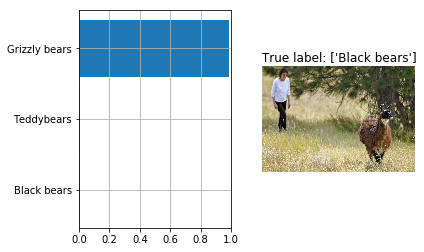

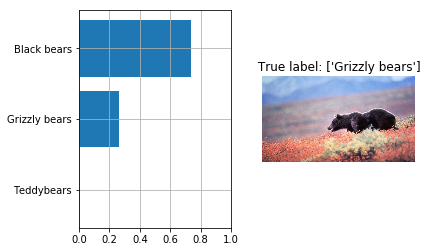

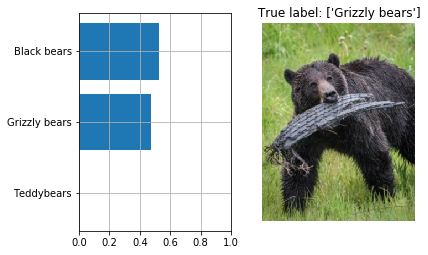

In [15]:
interpreter.plot_most_incorrect_samples(3)

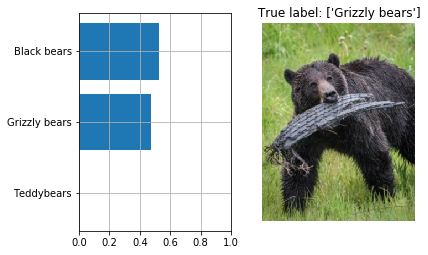

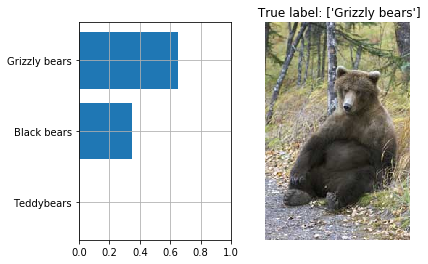

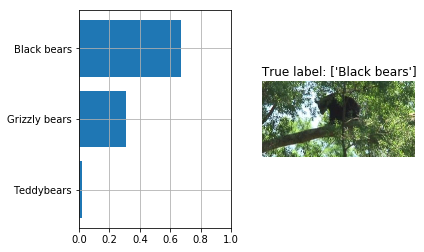

In [16]:
interpreter.plot_most_uncertain_samples(3)

In [17]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=94), Output()), _do…